In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import everythin for a sequential keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

# Subtask 2

In [5]:
train_features_data=pd.read_csv('train_features.csv')
labels_data=pd.read_csv('train_labels.csv')
# add labels with matching pid to features
labels_copied = pd.DataFrame()
labels_copied = labels_data.loc[labels_data.index.repeat(12)]
labels_copied = labels_copied.drop(columns=['pid'])

In [6]:
labels = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2']
X = train_features_data.drop(columns=['pid', 'Time']).reset_index(drop=True).fillna(train_features_data.mean())
y = labels_copied[labels]

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state=12)
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

Epoch 1/400
90/90 [==============================] - 1s 7ms/step - loss: 1.6136 - auc_2: 0.5964
Epoch 2/400
90/90 [==============================] - 1s 7ms/step - loss: 0.4545 - auc_2: 0.6638
Epoch 3/400
90/90 [==============================] - 1s 7ms/step - loss: 0.4362 - auc_2: 0.6818
Epoch 4/400
90/90 [==============================] - 1s 8ms/step - loss: 0.4300 - auc_2: 0.6891
Epoch 5/400
90/90 [==============================] - 1s 12ms/step - loss: 0.4255 - auc_2: 0.6941
Epoch 6/400
90/90 [==============================] - 1s 11ms/step - loss: 0.4247 - auc_2: 0.6955
Epoch 7/400
90/90 [==============================] - 1s 12ms/step - loss: 0.4242 - auc_2: 0.6945
Epoch 8/400
90/90 [==============================] - 1s 11ms/step - loss: 0.4228 - auc_2: 0.6969
Epoch 9/400
90/90 [==============================] - 1s 10ms/step - loss: 0.4222 - auc_2: 0.6974
Epoch 10/400
90/90 [==============================] - 1s 10ms/step - loss: 0.4209 - auc_2: 0.6988
Epoch 11/400
90/90 [=============

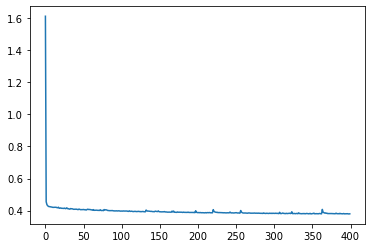

In [11]:
model = Sequential([
    Dense(units=128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(units=128, activation='relu'),
    #Dropout(0.2),
    Dense(units=10, activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

history = model.fit(X_train,y_train, epochs=400, batch_size=2048)

plt.plot(history.history['loss'])
plt.show()

y_pred = model.predict(X_test)

In [13]:
#calculate the AUC ROC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plt.plot(fpr, tpr)
print(roc_auc_score(y_test, y_pred)) 

0.682854805612014


In [20]:
df_test_features = pd.read_csv('test_features.csv')
df_submission = pd.DataFrame()
df_submission['pid'] = df_test_features['pid']
predictions = model.predict(df_test_features.drop(columns=['pid', 'Time']).reset_index(drop=True).fillna(df_test_features.mean()))
df_predictions = pd.DataFrame(predictions)
for i,label in enumerate(labels):
    df_submission[label] = predictions[:,i]
df_submission.to_csv('submission_subtask_1.csv', index=False)
